First move the data folder from root to inside habitat-lab <br>
(habitat) root@46b361c36ad9:/# mv data habitat-lab

In [1]:
# @title Colab Setup and Imports { display-mode: "form" }
# @markdown (double click to see the code)

import os
import random
import json
import git
import numpy as np
from gym import spaces

%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

repo = git.Repo(".", search_parent_directories=True)
dir_path = repo.working_tree_dir
data_path = os.path.join(dir_path, "data")
os.chdir(dir_path)

from PIL import Image

import habitat
from habitat.core.logging import logger
from habitat.core.registry import registry
from habitat.sims.habitat_simulator.actions import HabitatSimActions
from habitat.tasks.nav.nav import NavigationTask
from habitat_baselines.common.baseline_registry import baseline_registry
from habitat_baselines.config.default import get_config as get_baselines_config

Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail


In [3]:
def display_sample(
    rgb_obs, semantic_obs=np.array([]), depth_obs=np.array([])
):  # noqa: B006
    from habitat_sim.utils.common import d3_40_colors_rgb
    rgb_img = Image.fromarray(rgb_obs, mode="RGB")

    arr = [rgb_img]
    titles = ["rgb"]
    if semantic_obs.size != 0:
        semantic_img = Image.new(
            "P", (semantic_obs.shape[1], semantic_obs.shape[0])
        )
        semantic_img.putpalette(d3_40_colors_rgb.flatten())
        semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
        semantic_img = semantic_img.convert("RGBA")
        arr.append(semantic_img)
        titles.append("semantic")

    if depth_obs.size != 0:
        depth_img = Image.fromarray(
            (depth_obs / 10 * 255).astype(np.uint8), mode="L"
        )
        arr.append(depth_img)
        titles.append("depth")

    plt.figure(figsize=(12, 8))
    for i, data in enumerate(arr):
        ax = plt.subplot(1, 3, i + 1)
        ax.axis("off")
        ax.set_title(titles[i])
        plt.imshow(data)
    plt.show(block=False)

In [4]:
def write_index_file(index_file_path, data_pairs):
    with open(index_file_path, "w") as index_file:
        for data_pair in data_pairs:
            index_file.write(json.dumps(data_pair) + "\n")

In [14]:
# if __name__ == "__main__":
#     config = habitat.get_config(
#         config_paths="./configs/test/habitat_all_sensors_test.yaml"
#     )
#     env = habitat.Env(config=config)

2024-02-24 07:55:48,825 Initializing dataset PointNav-v1
2024-02-24 07:55:49,218 initializing sim Sim-v0
2024-02-24 07:55:50,354 Initializing task Nav-v0


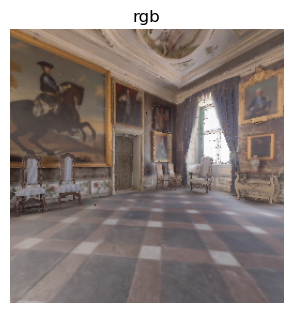

distance to goal: 5.64
angle to goal (radians): 2.88
TURN_RIGHT
1


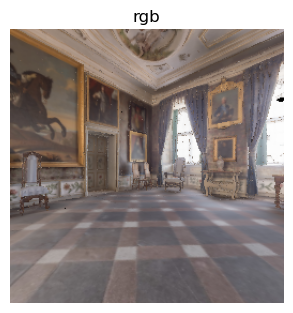

distance to goal: 5.64
angle to goal (radians): 3.06
TURN_RIGHT
2


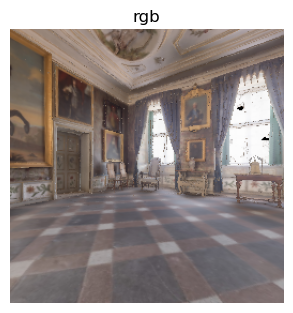

distance to goal: 5.64
angle to goal (radians): -3.05
TURN_LEFT
3


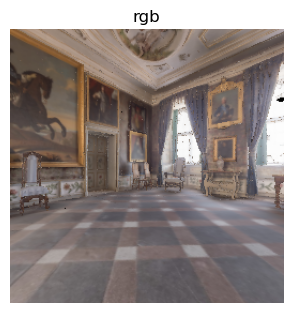

distance to goal: 5.64
angle to goal (radians): 3.06
MOVE_FORWARD
4


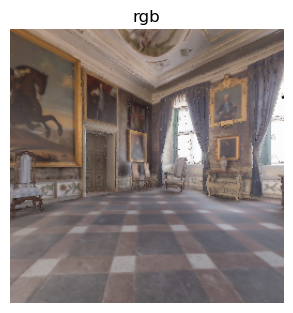

distance to goal: 5.89
angle to goal (radians): 3.06
TURN_RIGHT
5


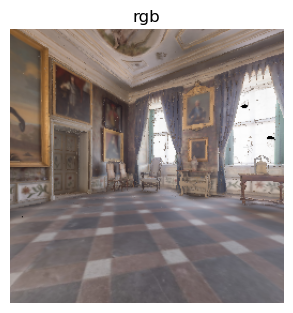

distance to goal: 5.89
angle to goal (radians): -3.05
MOVE_FORWARD
6


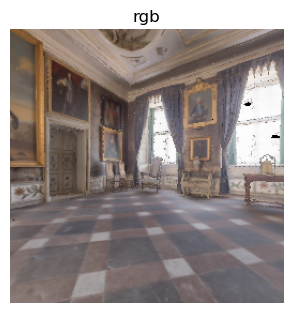

distance to goal: 6.14
angle to goal (radians): -3.05
TURN_RIGHT
7


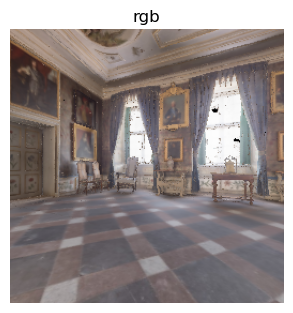

distance to goal: 6.14
angle to goal (radians): -2.88
TURN_RIGHT
8


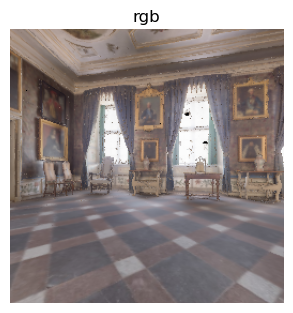

distance to goal: 6.14
angle to goal (radians): -2.70
MOVE_FORWARD
9


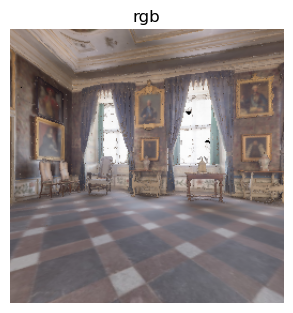

distance to goal: 6.37
angle to goal (radians): -2.72
TURN_LEFT
10


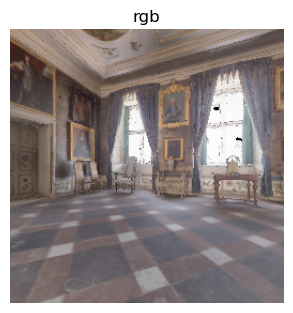

distance to goal: 6.37
angle to goal (radians): -2.89
MOVE_FORWARD
11


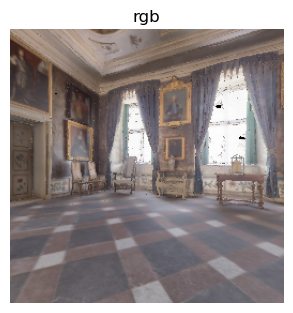

distance to goal: 6.61
angle to goal (radians): -2.90
TURN_LEFT
12


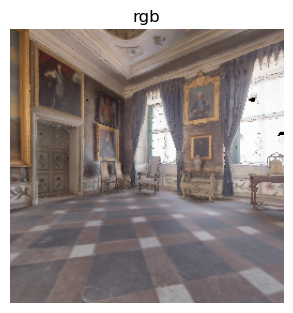

distance to goal: 6.61
angle to goal (radians): -3.08
TURN_LEFT
13


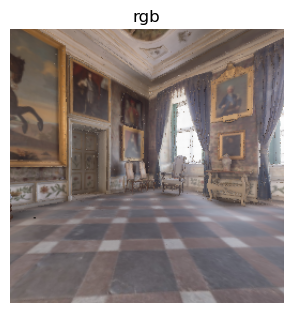

distance to goal: 6.61
angle to goal (radians): 3.03
MOVE_FORWARD
14


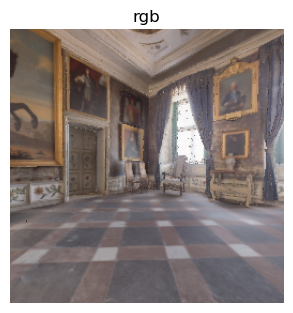

distance to goal: 6.86
angle to goal (radians): 3.03
TURN_RIGHT
15


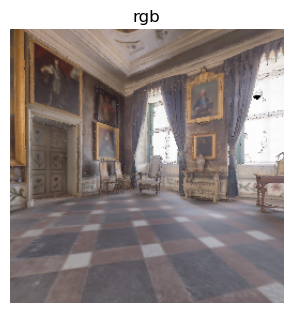

distance to goal: 6.86
angle to goal (radians): -3.07
TURN_RIGHT
16


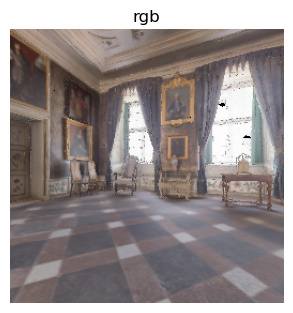

distance to goal: 6.86
angle to goal (radians): -2.90
TURN_LEFT
17


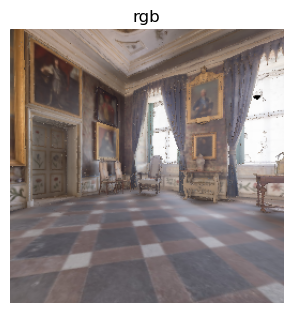

distance to goal: 6.86
angle to goal (radians): -3.07
MOVE_FORWARD
18


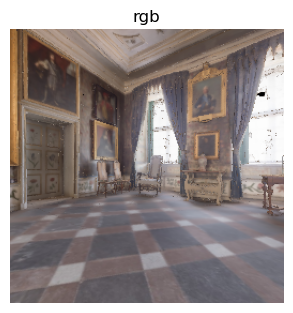

distance to goal: 7.11
angle to goal (radians): -3.08
MOVE_FORWARD
19


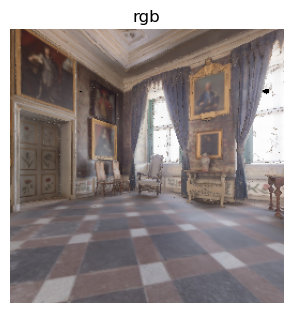

distance to goal: 7.36
angle to goal (radians): -3.08
TURN_LEFT
20


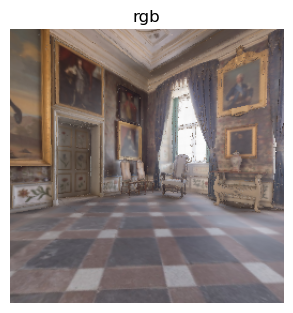

distance to goal: 7.36
angle to goal (radians): 3.03
TURN_RIGHT
21


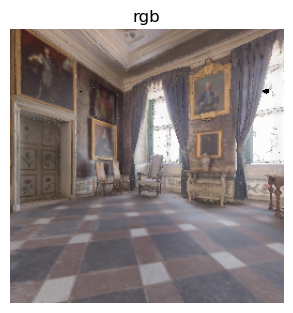

distance to goal: 7.36
angle to goal (radians): -3.08
TURN_LEFT
22


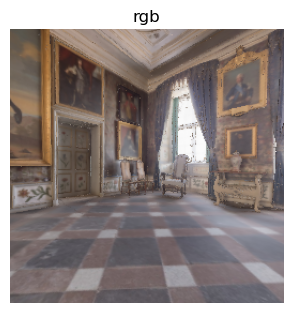

distance to goal: 7.36
angle to goal (radians): 3.03
TURN_RIGHT
23


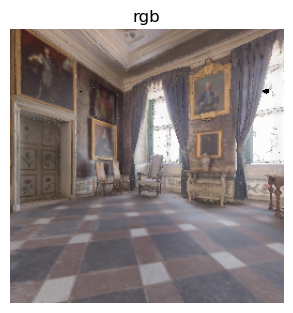

distance to goal: 7.36
angle to goal (radians): -3.08
TURN_LEFT
24


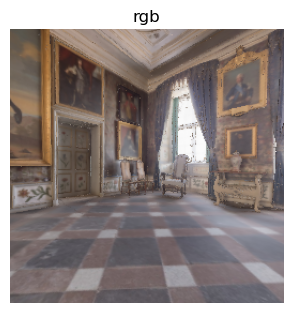

distance to goal: 7.36
angle to goal (radians): 3.03
TURN_LEFT
25


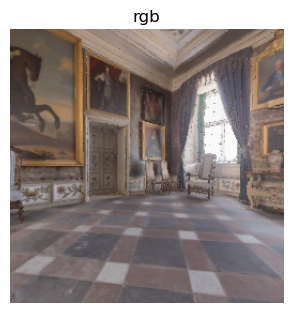

distance to goal: 7.36
angle to goal (radians): 2.86
TURN_LEFT
26


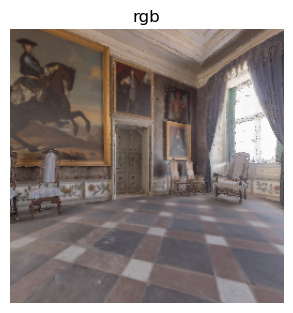

distance to goal: 7.36
angle to goal (radians): 2.68
TURN_LEFT
27


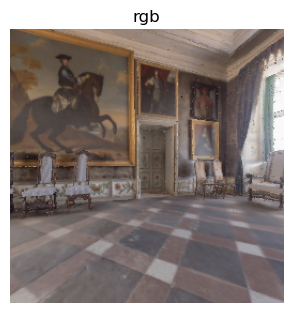

distance to goal: 7.36
angle to goal (radians): 2.51
TURN_RIGHT
28


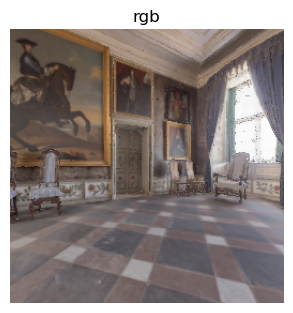

distance to goal: 7.36
angle to goal (radians): 2.68
TURN_RIGHT
29


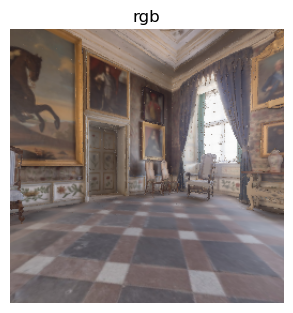

distance to goal: 7.36
angle to goal (radians): 2.86
MOVE_FORWARD
30


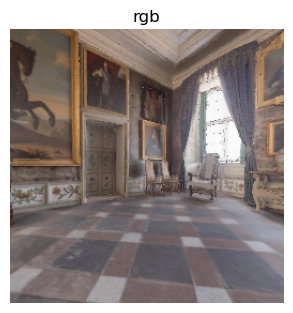

distance to goal: 7.60
angle to goal (radians): 2.86
TURN_RIGHT
31


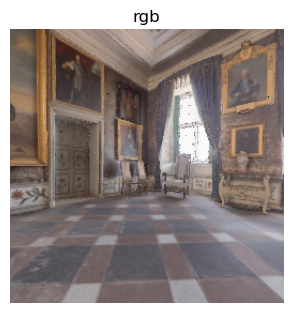

distance to goal: 7.60
angle to goal (radians): 3.04
TURN_LEFT
32


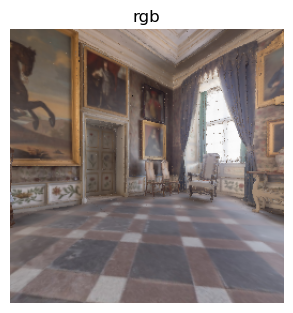

distance to goal: 7.60
angle to goal (radians): 2.86
TURN_RIGHT
33


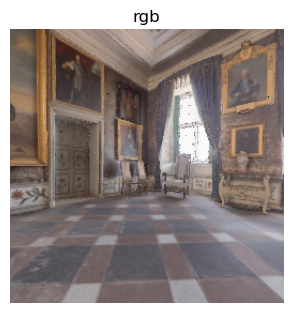

distance to goal: 7.60
angle to goal (radians): 3.04
TURN_RIGHT
34


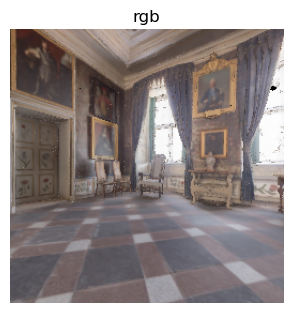

distance to goal: 7.60
angle to goal (radians): -3.07
MOVE_FORWARD
35


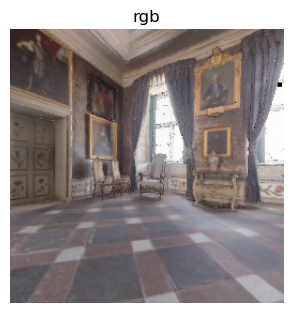

distance to goal: 7.85
angle to goal (radians): -3.07
TURN_RIGHT
36


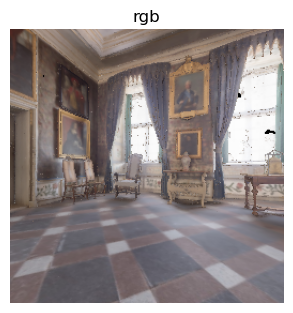

distance to goal: 7.85
angle to goal (radians): -2.90
TURN_RIGHT
37


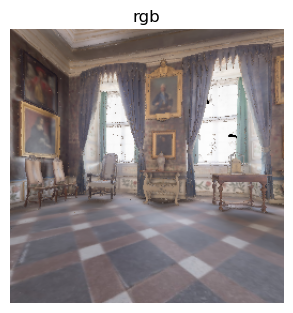

distance to goal: 7.85
angle to goal (radians): -2.72
TURN_LEFT
38


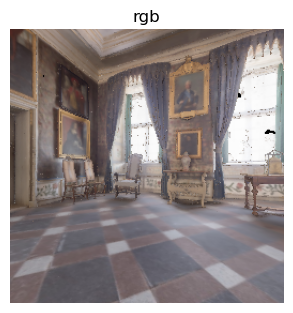

distance to goal: 7.85
angle to goal (radians): -2.90
MOVE_FORWARD
39


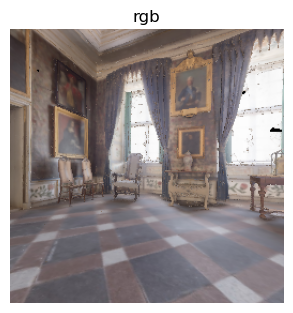

distance to goal: 8.09
angle to goal (radians): -2.90
MOVE_FORWARD
40


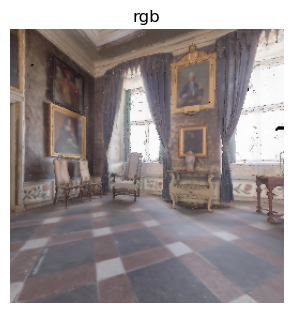

distance to goal: 8.33
angle to goal (radians): -2.91
TURN_LEFT
41


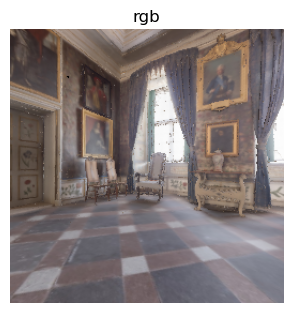

distance to goal: 8.33
angle to goal (radians): -3.09
TURN_LEFT
42


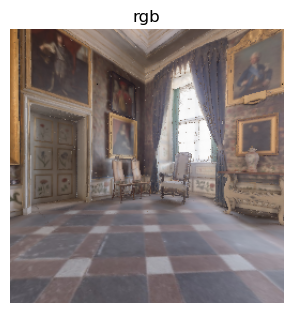

distance to goal: 8.33
angle to goal (radians): 3.02
TURN_LEFT
43


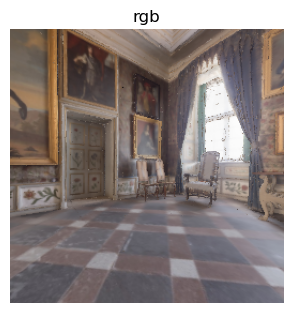

distance to goal: 8.33
angle to goal (radians): 2.85
MOVE_FORWARD
44


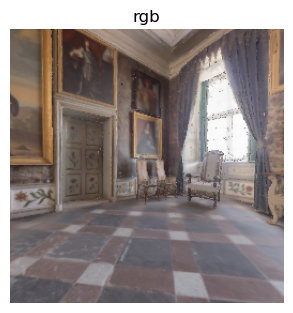

distance to goal: 8.57
angle to goal (radians): 2.86
TURN_RIGHT
45


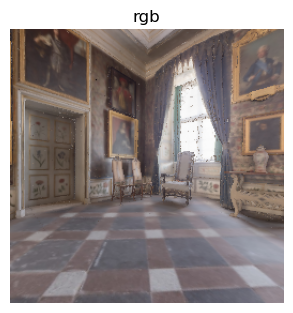

distance to goal: 8.57
angle to goal (radians): 3.03
TURN_LEFT
46


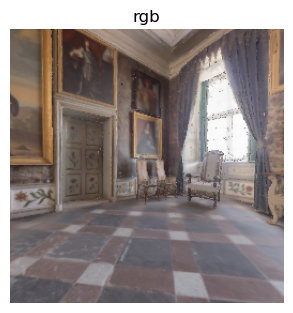

distance to goal: 8.57
angle to goal (radians): 2.86
MOVE_FORWARD
47


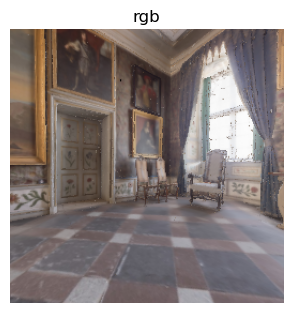

distance to goal: 8.81
angle to goal (radians): 2.86
TURN_LEFT
48


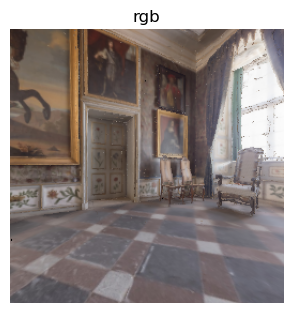

distance to goal: 8.81
angle to goal (radians): 2.69
TURN_LEFT
49


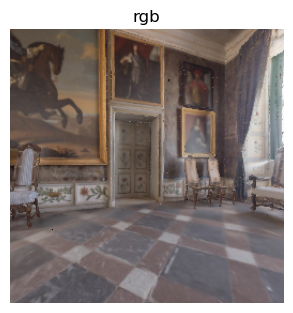

distance to goal: 8.81
angle to goal (radians): 2.52
TURN_LEFT
50


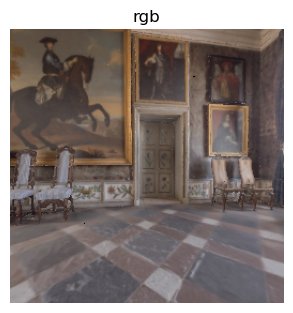

distance to goal: 8.81
angle to goal (radians): 2.34
TURN_LEFT
51


In [17]:
config = habitat.get_config(
    config_paths="./configs/test/habitat_all_sensors_test.yaml",
    opts=[
        "ENVIRONMENT.MAX_EPISODE_STEPS","100"
    ],
)



env = habitat.Env(config=config)
obs = env.reset()

# obs = env.reset()
valid_actions = ["TURN_LEFT", "TURN_RIGHT", "MOVE_FORWARD", "STOP"]
valid_actions_2= ["TURN_LEFT", "TURN_RIGHT", "MOVE_FORWARD"]
interactive_control = False  # @param {type:"boolean"}


source_folder = os.path.join(data_path,"source")
target_folder = os.path.join(data_path,"target")

data_pairs = []
index = 0

kt = 51
i = 1
while kt:
    # Sample action randomly from the available action space
    action = random.choice(valid_actions_2)
    
    # Take a step in the environment with the sampled action -IMPORTANT 
    next_obs = env.step({"action": action})
    
    # Collect observations
    source_image = obs["rgb"]
    target_image = next_obs["rgb"]
    
    # Write images to disk
    source_image_path = os.path.join(source_folder, f"source_{index}.jpg")
    target_image_path = os.path.join(target_folder, f"target_{index}.jpg")
    Image.fromarray(source_image).save(source_image_path)
    Image.fromarray(target_image).save(target_image_path)
    
    # Record data pair in index file
    data_pairs.append({
        "source_pth": source_image_path,
        "target_pth": target_image_path,
        "instruction": action
    })
    
    
    #DISPLAY THE IMAGE AND ACTION
    display_sample(obs["rgb"])
    print(
        "distance to goal: {:.2f}".format(
            obs["pointgoal_with_gps_compass"][0]
        )
    )
    print(
        "angle to goal (radians): {:.2f}".format(
            obs["pointgoal_with_gps_compass"][1]
        )
    )
    print(action)
    print(i)
    
    
    # action = random.choice(valid_actions_2)
    # obs = env.step({"action": action})
    
    obs = next_obs
    index += 1
    kt -= 1
    i += 1 
    # obs = env.reset()
    
# Write index file
index_file_path = os.path.join(data_path, "index.json")
write_index_file(index_file_path, data_pairs)
        
env.close()

In [ ]:
env

{'NV_LIBCUBLAS_VERSION': '10.2.1.243-1',
 'HOSTNAME': 'cb1320ad74b8',
 'LD_LIBRARY_PATH': '/usr/lib/x86_64-linux-gnu:/usr/lib/i386-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64',
 'NV_LIBNCCL_PACKAGE_VERSION': '2.8.3-1',
 'HOME': '/root',
 'CUDA_VERSION': '10.1.243',
 'NV_LIBCUBLAS_PACKAGE_NAME': 'libcublas10',
 'NVIDIA_REQUIRE_CUDA': 'cuda>=10.1 brand=tesla,driver>=396,driver<397 brand=tesla,driver>=410,driver<411 brand=tesla,driver>=418,driver<419',
 'NVIDIA_DRIVER_CAPABILITIES': 'compute,utility,graphics,compat32,utility',
 'NV_CUDA_LIB_VERSION': '10.1.243-1',
 'NV_LIBCUSPARSE_VERSION': '10.1.243-1',
 'NV_LIBNCCL_PACKAGE_NAME': 'libnccl2',
 'MAGNUM_LOG': 'quiet',
 'NV_CUDA_CUDART_VERSION': '10.1.243-1',
 'GLOG_minloglevel': '2',
 'PATH': '/opt/conda/envs/habitat/bin:/root/.vscode-server/bin/903b1e9d8990623e3d7da1df3d33db3e42d80eda/bin/remote-cli:/opt/conda/envs/habitat/bin:/opt/conda/condabin:/opt/conda/bin:/usr/local/nvidia/bi

In [18]:
print(env.get_metrics())

{'distance_to_goal': 9.154409408569336, 'success': 0.0, 'spl': 0.0, 'softspl': 0.0}
